In [ ]:
#import libraries for generating report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#Import Pandas
import pandas as pd
#Import numpy
import numpy as np

In [ ]:
# Read the training data from the drive
train = pd.read_csv('/content/train_all_tasks.csv',',', names=['rewire_id', 'text','label_sexist', 'label_category', 'label_vector'])
train=train.drop(train.index[0:1])
train = train[train.label_sexist != 'not sexist']
train.head()

<ipython-input-2-6198ecdb611d>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  train = pd.read_csv('/content/train_all_tasks.csv',',', names=['rewire_id', 'text','label_sexist', 'label_category', 'label_vector'])


,rewire_id,text,label_sexist,label_category,label_vector
9,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
12,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
18,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
19,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
20,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder().fit(train['label_category'])
train['label_category']=labelencoder.fit_transform(train['label_category'])

In [ ]:
print(train)

                      rewire_id  \
9      sexism2022_english-10142   
12       sexism2022_english-760   
18      sexism2022_english-1108   
19     sexism2022_english-10099   
20     sexism2022_english-10014   
...                         ...   
13978  sexism2022_english-19317   
13991  sexism2022_english-15667   
13994   sexism2022_english-1400   
13995   sexism2022_english-4515   
13996  sexism2022_english-14185   

                                                    text label_sexist  \
9      just the inside of your wallet: cash, bank car...       sexist   
12     They get the initial chance because they are a...       sexist   
18                       ugly chicks A pussy is a pussy.       sexist   
19     fuck her off with a nine mm this is what you g...       sexist   
20     How about I talk shit to an idiot like you? Ar...       sexist   
...                                                  ...          ...   
13978  Another Democrat with signal eyeglasses.There ...       sexis

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


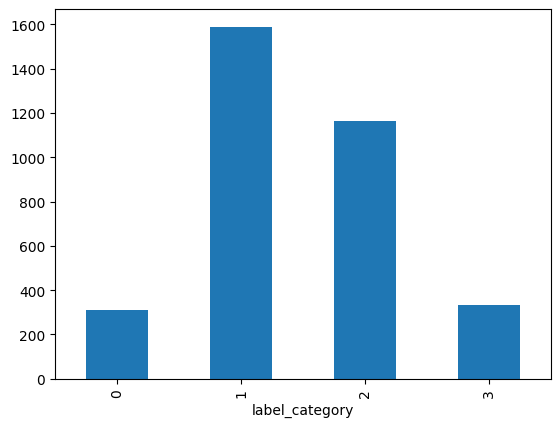

In [ ]:
train.groupby('label_category').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess(sentence):
    sentence=str(sentence)
    #sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    rem_tag = re.sub(r'@\S+', '',rem_num)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_tag)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    return " ".join(filtered_words)

train['text']=train['text'].map(lambda s:preprocess(s))


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(train['text']).toarray()
final_features.shape

(3398, 2937)

In [ ]:
#X_test.head()

In [ ]:
train_df = pd.DataFrame()
train_df['text'] = train['text']
train_df['label_category'] = train['label_category']
train_df.head()

# this block is to split the dataset into training and testing set
#X['text'] = train_df['text']
#Y['label_category'] = train_df['label_category']

train_df, eval_df = train_test_split(train_df, test_size=0.10)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
print(train_df.shape)
print(eval_df.shape)

(3058, 2)
(340, 2)


In [ ]:
## Try splitting into train and test

# **ALBERT**

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import wandb

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 3
model_args.evaluate_during_training = False
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 16
model_args.eval_batch_size = 16
#model_args.labels_list = ['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions']
model_args.wandb_project = "Simple Sweep"

sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "train_loss", "goal": "minimize"},
    "parameters": {
        "num_train_epochs": {"values": [2, 3, 5]},
        "learning_rate": {"min": 5e-5, "max": 4e-4},
    },
}

sweep_id = wandb.sweep(sweep_config, project="Simple Sweep")

wandb.init(project="Simple Sweep", entity="posh279")

wandb.config = {
  "learning_rate": 0.0001,
  "epochs": 3,
  "batch_size": 1
}

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: 21c3upgm
Sweep URL: https://wandb.ai/posh279/Simple%20Sweep/sweeps/21c3upgm


wandb: Currently logged in as: svshruti28 (posh279). Use `wandb login --relogin` to force relogin


In [ ]:
albert=ClassificationModel('albert','albert-base-v1',num_labels=4,use_cuda=True,args=model_args) #{
        #"reprocess_input_data" : True,
        #"use_cached_eval_features":False,
        #"overwrite_output_dir": True,
        #"num_train_epochs": 3 }) #Increase for better performance


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.decoder.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You sho

In [ ]:
albert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.107826656765408)

In [ ]:
albert.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▆▇▅█▇█▂▅▃▅▁
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.80342
global_step,550
lr,0.0


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


({'mcc': 0.22759670600515075, 'eval_loss': 1.0358734130859375},
 array([[-1.08300781,  1.41015625,  1.13867188, -2.078125  ],
        [-0.52441406,  1.35644531,  1.15332031, -2.3984375 ],
        [-1.00683594,  1.31347656,  0.96484375, -1.87597656],
        ...,
        [-1.34667969,  1.47363281,  1.23632812, -1.86230469],
        [-1.19042969,  1.43359375,  1.68261719, -2.37695312],
        [-1.07128906,  1.37207031,  0.92822266, -1.93847656]]),
 [{'guid': 1, 'text_a': 'well drag hope friends arent bitches', 'text_b': None, 'label': 0},
  {'guid': 2, 'text_a': 'The dyke haircuts always give away', 'text_b': None, 'label': 2},
  {'guid': 3, 'text_a': 'She disobeyed male keeper She knew rules', 'text_b': None, 'label': 3},
  {'guid': 5, 'text_a': 'Washed tramp cock mouth', 'text_b': None, 'label': 1},
  {'guid': 6, 'text_a': 'girls ever used rejection way coddled world spoiled shes normal', 'text_b': None, 'label': 2},
  {'guid': 9, 'text_a': 'Make FWB give false hope next months years 

# **BERT**

In [ ]:
bert=ClassificationModel('bert','bert-base-uncased',num_labels=4,use_cuda=True,args=model_args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
bert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 0.9566258721881442)

In [ ]:
bert.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▆▇█▄▅▅▂▃▃▁▂
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.77686
global_step,550
lr,0.0


({'mcc': 0.3498668047779314, 'eval_loss': 1.0039580952037463},
 array([[-1.10742188,  2.02148438,  1.84765625, -2.375     ],
        [-1.29296875,  1.71289062,  2.234375  , -2.23046875],
        [-1.79492188,  1.5078125 ,  1.85546875, -1.30175781],
        ...,
        [-1.95800781,  1.75195312,  2.11328125, -1.84863281],
        [-1.22851562,  2.52148438,  1.11425781, -2.19140625],
        [-1.65820312,  2.21679688,  1.9296875 , -2.1796875 ]]),
 [{'guid': 1, 'text_a': 'well drag hope friends arent bitches', 'text_b': None, 'label': 0},
  {'guid': 3, 'text_a': 'She disobeyed male keeper She knew rules', 'text_b': None, 'label': 3},
  {'guid': 5, 'text_a': 'Washed tramp cock mouth', 'text_b': None, 'label': 1},
  {'guid': 6, 'text_a': 'girls ever used rejection way coddled world spoiled shes normal', 'text_b': None, 'label': 2},
  {'guid': 8, 'text_a': 'mean comes conformity wanting like celebrities yea ungrateful hoes', 'text_b': None, 'label': 2},
  {'guid': 9, 'text_a': 'Make FWB giv

# **ROBERTA**

In [ ]:
roberta=ClassificationModel('roberta','roberta-base',num_labels=4,use_cuda=True,args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
roberta.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 0.9078360100587209)

In [ ]:
roberta.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▄█▅▃▅▃▄▁▂▄▃
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.81351
global_step,550
lr,0.0


({'mcc': 0.39794153626694967, 'eval_loss': 0.8883194489912554},
 array([[-1.43457031,  2.10351562,  2.23632812, -3.1484375 ],
        [-1.74316406,  1.40429688,  2.97070312, -2.640625  ],
        [-1.15136719,  1.89550781,  1.74414062, -2.95117188],
        ...,
        [-2.12304688,  2.3984375 ,  2.07421875, -2.16015625],
        [-1.56835938,  2.54296875,  1.87792969, -2.98828125],
        [-1.65527344,  2.84179688,  1.40722656, -2.66015625]]),
 [{'guid': 0, 'text_a': 'Awwww look butt fucking little Jew maggot getting feelings hurt take Midol bitch', 'text_b': None, 'label': 1},
  {'guid': 1, 'text_a': 'well drag hope friends arent bitches', 'text_b': None, 'label': 0},
  {'guid': 2, 'text_a': 'The dyke haircuts always give away', 'text_b': None, 'label': 2},
  {'guid': 3, 'text_a': 'She disobeyed male keeper She knew rules', 'text_b': None, 'label': 3},
  {'guid': 6, 'text_a': 'girls ever used rejection way coddled world spoiled shes normal', 'text_b': None, 'label': 2},
  {'guid': 

# **DISTILBERT**

In [ ]:
distilbert=ClassificationModel('distilbert','distilbert-base-cased',num_labels=4,use_cuda=True,args=model_args)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bia

In [ ]:
distilbert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 0.8638216522004869)

In [ ]:
distilbert.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▇██▇▇▄▇▄▃▁▅
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.69088
global_step,550
lr,0.0


({'mcc': 0.31846363905925446, 'eval_loss': 1.033347650007768},
 array([[-1.37890625,  0.75927734,  1.98339844, -2.64648438],
        [-0.82519531,  0.31201172,  2.01953125, -2.50976562],
        [-1.61425781,  1.75976562,  0.9453125 , -2.51757812],
        ...,
        [-1.62207031,  1.45117188,  1.76367188, -2.8359375 ],
        [-2.1484375 ,  2.24023438,  1.04296875, -2.64453125],
        [-2.26171875,  1.91210938,  1.38964844, -2.625     ]]),
 [{'guid': 0, 'text_a': 'Awwww look butt fucking little Jew maggot getting feelings hurt take Midol bitch', 'text_b': None, 'label': 1},
  {'guid': 1, 'text_a': 'well drag hope friends arent bitches', 'text_b': None, 'label': 0},
  {'guid': 2, 'text_a': 'The dyke haircuts always give away', 'text_b': None, 'label': 2},
  {'guid': 3, 'text_a': 'She disobeyed male keeper She knew rules', 'text_b': None, 'label': 3},
  {'guid': 5, 'text_a': 'Washed tramp cock mouth', 'text_b': None, 'label': 1},
  {'guid': 6, 'text_a': 'girls ever used rejection w

# **XLNET**

In [ ]:
xlnet=ClassificationModel('xlnet','xlnet-base-cased',num_labels=4,use_cuda=True,args=model_args)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
xlnet.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3058 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/192 [00:00<?, ?it/s]

(576, 1.122845795419481)

In [ ]:
xlnet.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/340 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/22 [00:00<?, ?it/s]

Training loss,▆▄▇▇▅▅▇▅▅█▁
global_step,▁▂▂▃▄▅▅▆▇▇█
lr,█▇▇▆▅▅▄▃▂▂▁
Training loss,0.70406
global_step,550
lr,0.0


({'mcc': 0.2770963543151506, 'eval_loss': 0.9980049133300781},
 array([[ 0.28320312,  1.42675781,  1.21875   , -2.58984375],
        [-1.5546875 ,  2.21679688,  1.48828125, -2.265625  ],
        [-1.48535156,  1.66992188,  1.35546875, -1.75097656],
        ...,
        [-2.1484375 ,  1.73632812,  1.22363281, -1.3359375 ],
        [-1.265625  ,  2.01953125,  1.78417969, -2.19335938],
        [-1.703125  ,  1.84960938,  1.69140625, -2.04492188]]),
 [{'guid': 1, 'text_a': 'well drag hope friends arent bitches', 'text_b': None, 'label': 0},
  {'guid': 2, 'text_a': 'The dyke haircuts always give away', 'text_b': None, 'label': 2},
  {'guid': 3, 'text_a': 'She disobeyed male keeper She knew rules', 'text_b': None, 'label': 3},
  {'guid': 5, 'text_a': 'Washed tramp cock mouth', 'text_b': None, 'label': 1},
  {'guid': 6, 'text_a': 'girls ever used rejection way coddled world spoiled shes normal', 'text_b': None, 'label': 2},
  {'guid': 8, 'text_a': 'mean comes conformity wanting like celebriti

In [ ]:
wandb.join()

# **TEST**

In [ ]:
# Read the test data from the drive
test = pd.read_csv('/content/test_task_b_entries.csv',',', names=['rewire_id','text'])
dev = pd.read_csv('/content/dev_task_b_entries.csv',',', names=['rewire_id','text'])
dev_labels = pd.read_csv('/content/dev_task_b_labels.csv',',', names=['rewire_id','text'])
test=test.drop(test.index[0:1])
dev=dev.drop(dev.index[0:1])
dev_labels=dev_labels.drop(dev_labels.index[0:1])

In [ ]:
test['text']=test['text'].map(lambda s:preprocess(s))
dev['text']=dev['text'].map(lambda s:preprocess(s))

In [ ]:
test

,rewire_id,text
1,sexism2022_english-10731,That tall man must certaily better women large...
2,sexism2022_english-7356,The lawyer chick shoot McDonald guy every time...
3,sexism2022_english-13064,Greek authorities move asylum seekers crowded ...
4,sexism2022_english-17039,statistic women find plurals attractive say st...
5,sexism2022_english-14482,woman speak like donkey braying quiet woman ol...
...,...,...
966,sexism2022_english-18444,fuck women jerk
967,sexism2022_english-2617,Agreed wife babe remember third child born wen...
968,sexism2022_english-18744,That cracks women men shamed little penis unle...
969,sexism2022_english-15798,Wow women sluts whores never thought like


In [ ]:
dev

,rewire_id,text
1,sexism2022_english-739,Every woman wants model codeword get everythin...
2,sexism2022_english-10787,Poor dude realized dont share emotions women S...
3,sexism2022_english-18547,Can women loyal make loyal Just understand wom...
4,sexism2022_english-6425,Lefties outraged hour Hold princess Michael Ke...
5,sexism2022_english-10001,That slag nerve showing face Bitch supposed mo...
...,...,...
482,sexism2022_english-1846,Hey Dick Sweat Guess happens boring pedantic s...
483,sexism2022_english-12865,want see hypergamy hyperdrive work live Calif ...
484,sexism2022_english-6864,constant isnt whenever women fall behind matte...
485,sexism2022_english-17934,yep fapping means chase vag Better bring full ...


In [ ]:
dev_labels

,rewire_id,text
1,sexism2022_english-739,2. derogation
2,sexism2022_english-10787,2. derogation
3,sexism2022_english-18547,2. derogation
4,sexism2022_english-6425,"1. threats, plans to harm and incitement"
5,sexism2022_english-10001,2. derogation
...,...,...
482,sexism2022_english-1846,3. animosity
483,sexism2022_english-12865,2. derogation
484,sexism2022_english-6864,2. derogation
485,sexism2022_english-17934,2. derogation


In [ ]:
recover= pd.read_csv('/content/test_task_b_entries.csv',',', names=['rewire_id', 'text'])
recover=recover.drop(recover.index[0:1])

sub = pd.DataFrame()
sub['rewire_id'] = recover['rewire_id']
### dev
recover_dev= pd.read_csv('/content/dev_task_b_entries.csv',',', names=['rewire_id', 'text'])
recover_dev=recover_dev.drop(recover_dev.index[0:1])

sub_dev = pd.DataFrame()
sub_dev['rewire_id'] = recover_dev['rewire_id']

# **ALBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = albert.predict(test['text'].tolist())
#print(predictions1)
predictions1_dev, raw_outputs_dev = albert.predict(dev['text'].tolist())
#print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
#print(prediction2)
prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
#print(prediction2_dev)

sub['albert_pred'] = prediction2
#print(sub.head())
sub_dev['albert_pred'] = prediction2_dev
#print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['albert_pred']

albert_f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

albert_f1

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.42348522731118377

# **BERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = bert.predict(test['text'].tolist())
#print(predictions1)

predictions1_dev, raw_outputs_dev = bert.predict(dev['text'].tolist())
#print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
#print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
#print(prediction2_dev)

sub['bert_pred'] = prediction2
#print(sub.head())

sub_dev['bert_pred'] = prediction2_dev
#print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['bert_pred']

bert_f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

bert_f1

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.54115556283846

# **ROBERTA PREDICTIONS**

In [ ]:
predictions1, raw_outputs = roberta.predict(test['text'].tolist())
#print(predictions1)

predictions1_dev, raw_outputs_dev = roberta.predict(dev['text'].tolist())
#print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
#print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
#print(prediction2_dev)

sub['roberta_pred'] = prediction2
#print(sub.head())

sub_dev['roberta_pred'] = prediction2_dev
#print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['roberta_pred']

roberta_f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

roberta_f1

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.5706664258701069

# **DISTILBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = distilbert.predict(test['text'].tolist())
#print(predictions1)

predictions1_dev, raw_outputs_dev = distilbert.predict(dev['text'].tolist())
#print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
#print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
#print(prediction2_dev)

sub['distilbert_pred'] = prediction2
#print(sub.head())

sub_dev['distilbert_pred'] = prediction2_dev
#print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['distilbert_pred']

distilbert_f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

distilbert_f1

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.5566428408887732

# **XLNET PREDICTIONS**

In [ ]:
predictions1, raw_outputs = xlnet.predict(test['text'].tolist())
#print(predictions1)

predictions1_dev, raw_outputs_dev = xlnet.predict(dev['text'].tolist())
#print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
#print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
#print(prediction2_dev)

sub['xlnet_pred'] = prediction2
#print(sub.head())

sub_dev['xlnet_pred'] = prediction2_dev
#print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['xlnet_pred']

xlnet_f1 = f1_score(y_true=y_true, y_pred=y_pred, average='macro')

xlnet_f1

  0%|          | 0/970 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

0.5014787933992958

# **Formatting Dataframe for Submission**

In [ ]:
sub['albert'] = sub['albert_pred'].replace(['1. threats, plans to harm and incitementt', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub['bert'] = sub['bert_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub['roberta'] = sub['roberta_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub['distilbert'] = sub['distilbert_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub['xlnet'] = sub['xlnet_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])

sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet
1,sexism2022_english-10731,2. derogation,3. animosity,3. animosity,2. derogation,3. animosity,2,3,3,2,3
2,sexism2022_english-7356,2. derogation,"1. threats, plans to harm and incitement",2. derogation,"1. threats, plans to harm and incitement",2. derogation,2,1,2,1,2
3,sexism2022_english-13064,2. derogation,"1. threats, plans to harm and incitement","1. threats, plans to harm and incitement","1. threats, plans to harm and incitement","1. threats, plans to harm and incitement",2,1,1,1,1
4,sexism2022_english-17039,2. derogation,3. animosity,3. animosity,3. animosity,2. derogation,2,3,3,3,2
5,sexism2022_english-14482,2. derogation,2. derogation,3. animosity,2. derogation,2. derogation,2,2,3,2,2


In [ ]:
sub_dev['albert'] = sub_dev['albert_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub_dev['bert'] = sub_dev['bert_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub_dev['roberta'] = sub_dev['roberta_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub_dev['distilbert'] = sub_dev['distilbert_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])
sub_dev['xlnet'] = sub_dev['xlnet_pred'].replace(['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'], [1, 2, 3, 4])

sub_dev.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet
1,sexism2022_english-739,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2
2,sexism2022_english-10787,2. derogation,3. animosity,2. derogation,3. animosity,2. derogation,2,3,2,3,2
3,sexism2022_english-18547,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2
4,sexism2022_english-6425,2. derogation,3. animosity,2. derogation,2. derogation,3. animosity,2,3,2,2,3
5,sexism2022_english-10001,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2


In [ ]:
import statistics
pred_val = []
for i in range(1, sub.shape[0] + 1): #iterate over rows
    row_val = []
    for j in ['roberta','xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value = sub.at[i, j] #get cell value
        row_val.append(value)
    pred_val.append(statistics.mode(row_val))
print(pred_val)

[3, 2, 1, 3, 2, 2, 2, 3, 3, 2, 1, 1, 3, 2, 3, 2, 2, 3, 4, 2, 4, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2, 2, 4, 3, 3, 2, 4, 2, 3, 1, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 3, 2, 2, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 3, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 3, 2, 4, 2, 3, 2, 2, 4, 2, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 2, 1, 3, 3, 2, 1, 2, 2, 2, 1, 4, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 4, 2, 2, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 4, 2, 2, 2, 3, 2, 1, 2, 3, 4, 2, 2, 3, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2, 3, 4, 2, 2, 2, 3, 3, 4, 3, 2, 4, 2, 4, 2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 4, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 

In [ ]:
import statistics
pred_val_dev = []
for i in range(1, sub_dev.shape[0] + 1): #iterate over rows
    row_val_dev = []
    for j in ['roberta', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value_dev = sub_dev.at[i, j] #get cell value
        row_val_dev.append(value_dev)
    pred_val_dev.append(statistics.mode(row_val_dev))
print(pred_val_dev)

[2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 3, 2, 2, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 4, 2, 1, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 3, 2, 3, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 4, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4, 1, 1, 2, 4, 4, 3, 4, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 3, 1, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 4, 2, 3, 4, 3, 2, 3, 3, 3, 4, 3, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 4, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 1, 3, 1, 3, 2, 2, 1, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 4, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 2, 2, 4, 2, 2, 

In [ ]:
import statistics
pred_val_dev = []
model_accuracy = {'bert':bert_f1, 'roberta': roberta_f1, 'distilbert':distilbert_f1, 'xlnet':xlnet_f1}
for i in range(1, sub_dev.shape[0] + 1): #iterate over rows
    row_val_dev = []
    prediction = {1:0, 2:0, 3:0, 4:0}
    for j in ['roberta', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value_dev = sub_dev.at[i, j] #get cell value
        #row_val_dev.append(value_dev)
        prediction[value_dev] += model_accuracy[j]
    pred_class = max(zip(prediction.values(), prediction.keys()))[1]
    pred_val_dev.append(pred_class)
print(pred_val_dev)

[2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 4, 2, 1, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 4, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 1, 3, 2, 3, 2, 4, 2, 2, 2, 3, 4, 2, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 3, 4, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 4, 2, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4, 1, 1, 2, 4, 4, 3, 4, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 4, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 1, 4, 2, 3, 4, 3, 2, 3, 3, 3, 4, 3, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 4, 2, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 1, 3, 2, 2, 1, 4, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 2, 2, 4, 2, 3, 

In [ ]:
sub['label_pred_enc'] = pred_val
sub['label_pred'] = sub['label_pred_enc'].replace([1, 2, 3, 4], ['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'])
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet,label_pred_enc,label_pred
1,sexism2022_english-10731,2. derogation,3. animosity,3. animosity,2. derogation,3. animosity,2,3,3,2,3,3,3. animosity
2,sexism2022_english-7356,2. derogation,"1. threats, plans to harm and incitement",2. derogation,"1. threats, plans to harm and incitement",2. derogation,2,1,2,1,2,2,2. derogation
3,sexism2022_english-13064,2. derogation,"1. threats, plans to harm and incitement","1. threats, plans to harm and incitement","1. threats, plans to harm and incitement","1. threats, plans to harm and incitement",2,1,1,1,1,1,"1. threats, plans to harm and incitement"
4,sexism2022_english-17039,2. derogation,3. animosity,3. animosity,3. animosity,2. derogation,2,3,3,3,2,3,3. animosity
5,sexism2022_english-14482,2. derogation,2. derogation,3. animosity,2. derogation,2. derogation,2,2,3,2,2,2,2. derogation


In [ ]:
sub_dev['label_pred_enc'] = pred_val_dev
sub_dev['label_pred'] = sub_dev['label_pred_enc'].replace([1, 2, 3, 4], ['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions'])
sub_dev.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred,albert,bert,roberta,distilbert,xlnet,label_pred_enc,label_pred
1,sexism2022_english-739,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2,2,2. derogation
2,sexism2022_english-10787,2. derogation,3. animosity,2. derogation,3. animosity,2. derogation,2,3,2,3,2,3,3. animosity
3,sexism2022_english-18547,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2,2,2. derogation
4,sexism2022_english-6425,2. derogation,3. animosity,2. derogation,2. derogation,3. animosity,2,3,2,2,3,2,2. derogation
5,sexism2022_english-10001,2. derogation,2. derogation,2. derogation,2. derogation,2. derogation,2,2,2,2,2,2,2. derogation


In [ ]:
final_sub = pd.DataFrame()
final_sub['rewire_id'] = sub['rewire_id']
final_sub['label_pred'] = sub['label_pred']

final_sub.head(100)

,rewire_id,label_pred
1,sexism2022_english-10731,3. animosity
2,sexism2022_english-7356,2. derogation
3,sexism2022_english-13064,"1. threats, plans to harm and incitement"
4,sexism2022_english-17039,3. animosity
5,sexism2022_english-14482,2. derogation
...,...,...
96,sexism2022_english-8575,2. derogation
97,sexism2022_english-3755,4. prejudiced discussions
98,sexism2022_english-12277,3. animosity
99,sexism2022_english-6906,3. animosity


In [ ]:
final_sub_dev = pd.DataFrame()
final_sub_dev['rewire_id'] = sub_dev['rewire_id']
final_sub_dev['label_pred'] = sub_dev['label_pred']

final_sub_dev.head(100)

,rewire_id,label_pred
1,sexism2022_english-739,2. derogation
2,sexism2022_english-10787,3. animosity
3,sexism2022_english-18547,2. derogation
4,sexism2022_english-6425,2. derogation
5,sexism2022_english-10001,2. derogation
...,...,...
96,sexism2022_english-5347,2. derogation
97,sexism2022_english-15065,2. derogation
98,sexism2022_english-17037,2. derogation
99,sexism2022_english-15696,2. derogation


In [ ]:
y_true = dev_labels['text']
y_pred = final_sub_dev['label_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

0.5730796971859312

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.605
Confusion matrix, without normalization


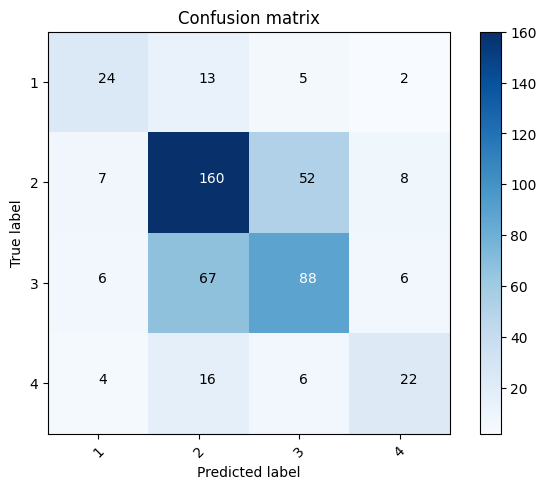

In [ ]:
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_true, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['1', '2', '3', '4'])

In [ ]:
final_sub.to_csv('/content/SemEval_TaskB.csv')